# Prepare beams from the elegant data

In [ ]:
from pmd_beamphysics import ParticleGroup
from pmd_beamphysics.interfaces.elegant import elegant_to_data

In [ ]:
EROOT = '../../elegant/beams/'
ebeam = EROOT+'Astra100pC_gaussian_3sigma_dist_10M_match.out'
#ebeam = EROOT+'Astra100pC_gaussian_100MeV_1M.out'

In [ ]:
!ls -ahl {ebeam}

In [ ]:
F = ebeam
#DAT = elegant_to_data(F, charge = 100e-12, sdds2plaindata_bin='/Users/chrisonian/Code/elegant/bin/sdds2plaindata')

In [ ]:
#!which sdds2plaindata

In [ ]:
#?elegant_to_data

In [ ]:
P1 = ParticleGroup(data=DAT)

In [ ]:
P1 = ParticleGroup(data=DAT)
P1.plot('delta_t', 'delta_pz', bins=200)

# Resample

In [2]:
# Make a bmad beam via ParticleGroup
# Note that these particles aim to follow the Bmad coordinate ( not at rest )

Q = 13E-12     # Total charge
Np = 13     # Number of macro particles
data = {'x':np.array([0,-1E-3,1E-3, 0,0,0,0,0,0,0,0,0,0]),
        'px':np.array([0,0,0,-1E-3,1E-3, 0,0,0,0,0,0,0,0]),
        'y':np.array([0,0,0,0,0,-1E-3,1E-3, 0,0,0,0,0,0]),
        'py':np.array([0,0,0,0,0,0,0,-1E-3,1E-3, 0,0,0,0]),
        'z':np.zeros(Np),
        'pz':np.array([0,0,0,0,0,0,0,0,0,0,0,-1E-3,1E-3]),
        't': np.array([0,0,0,0,0,0,0,0,0,-1E-3,1E-3, 0,0]),
        'status':np.ones(Np), 
        'weight':np.ones(Np)*Q/Np, 
        'species':'electron'}
P = ParticleGroup(data=data)

P.write_bmad('bmad/beam_13p_bmad.txt')
#P.write_elegant('elegant/beam_13p_elegant.sdds')

In [ ]:
P1.n_particle

In [ ]:
import numpy as np

In [ ]:
#NPART = 100000
NPART = 10000000
NPART = 9988000
NPART = 10000

P3 = P1.resample(NPART)
#P3 = P2.copy()
PARTNAME=str(NPART//1000)+'k'
#PARTNAME=str(NPART//1000000)+'M'
PARTNAME

In [ ]:
FNAME=f'beam_BEAM0_{PARTNAME}_unheated.txt'
print(FNAME)

In [ ]:
FNAME=f'beam_BEAM0_{PARTNAME}_unheated.txt'
P3.write_bmad(FNAME, verbose=True, p0c=P3['mean_p'], t_ref=P3['mean_t'])

In [ ]:
heat = 7e3 # eV
P3.pz += np.random.normal(size=len(P3))*heat

In [ ]:
P3.plot('delta_t', 'pz', bins=200)

In [ ]:
P0C = P3['mean_p']
P0C

In [ ]:
FNAME=f'beam_BEAM0_{PARTNAME}.txt'
P3.write_bmad(FNAME, verbose=True, p0c=P3['mean_p'], t_ref=P3['mean_t'])

In [ ]:
!ls -lah

In [ ]:
!pwd

In [31]:
#This converts h5 file from Bmad to sdds file required by Elegant

from pmd_beamphysics import ParticleGroup, particle_paths, pmd_init
from h5py import File

locname='CM14END'
#H5FILE = '/global/homes/w/wlou1991/cfs/csr_lcls/Aug12_2020_alloff_Np11/beam0.hdf5'
H5FILE = '/global/homes/w/wlou1991/cfs/csr_lcls/Aug18_2020_alloff_Np1001/beam_BEAM0_1001_nopz.hdf5'
H5FILE = '/global/homes/w/wlou1991/cfs/csr_lcls/Aug18_2020_alloff_Np1001/Nb_0_Np_100k/'+ str(locname)+'.hdf5'
#H5FILE = '/global/homes/w/wlou1991/cfs/csr_lcls/Aug18_2020_alloff_Np1001/beam0.hdf5'
#H5FILE = 'data/astra_particles.h5'

# Load
h5 = File(H5FILE, 'r')
ppaths = particle_paths(h5)
ph5 = h5[ppaths[0]]

P = ParticleGroup(ph5)

#P.write_elegant('beam_BEAM0_1001_nopz.sdds')
P.write_elegant(str(locname) + '.sdds')
#P.write_elegant('DC2OB.sdds')


In [17]:
P.t*1E7

array([4.19031713, 4.19031711, 4.1903171 , ..., 4.19029743, 4.19029741,
       4.19029739])

In [4]:
import matplotlib.pyplot as plt

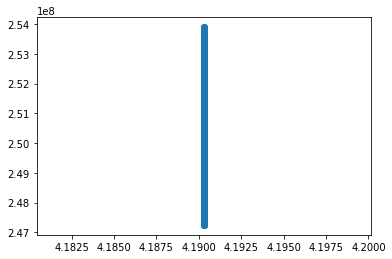

In [18]:
plt.scatter(P.t*1E7,P.p,label='Elegant')

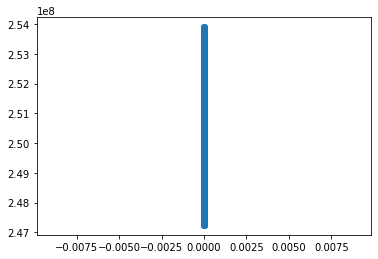

In [5]:
plt.scatter(P['delta_t'],P.p,label='Elegant')

In [ ]:
plt.scatter(P.x,P.xp,label='Elegant')

In [8]:
P.t

array([3.94153863e-07, 3.94153857e-07, 3.94153850e-07, ...,
       3.94147217e-07, 3.94147210e-07, 3.94147204e-07])

In [ ]:
def f3(beam_subdir,location):
    beam_dir = '/global/homes/w/wlou1991/cfs/csr_lcls/Aug18_2020_alloff_Np1001/'
    H5FILE= beam_dir + beam_subdir  + locationList3[location-1] +'.hdf5'
    print('Filename:' + str(H5FILE))
    #h5 = File(H5FILE, 'r')
    #ppaths = particle_paths(h5)
    #ph5 = h5[ppaths[0]]
    P=ParticleGroup(H5FILE)
    Palive = P.where(P['status'] == 1)
    return Palive

In [ ]:
plt.scatter(haha['delta_t'],haha.p,label='Bmad')